In [1]:
conda install pytorch-cpu torchvision-cpu -c pytorch

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - pytorch-cpu
    - torchvision-cpu


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    intel-openmp-2019.4        |              243         729 KB  defaults
    mkl-2019.4                 |              243       131.2 MB  defaults
    ninja-1.9.0                |       hc9558a2_1         1.6 MB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    pytorch-cpu-1.1.0          |      py3.6_cpu_0        53

In [3]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2019-12-11 08:35:42--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-12-11 08:35:42 (33.7 MB/s) - ‘helper.py’ saved [2813/2813]



In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [7]:
from torchvision import datasets,transforms
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)), ])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [8]:
data=iter(trainloader)
images , labels=data.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


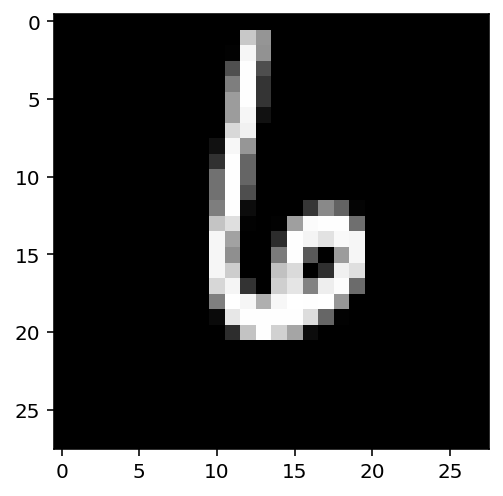

In [10]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [11]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

In [14]:
n_input=784
n_hidden=256
n_output=10
inputs = images.view(images.shape[0], -1)
W1=torch.randn(784,256)
B1=torch.randn(256)
W2=torch.randn(256,10)
B2=torch.randn(10)
y=sigmoid(torch.matmul(inputs,W1)+B1)
output=torch.matmul(y,W2)+B2

In [15]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)


In [17]:
probabilities=softmax(output)
print(probabilities.shape)

torch.Size([64, 10])
